In [18]:
import sys
sys.path.append("../src")

In [19]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from hands_on_neuroai.data.datasets import TaskDataset, PermutePixels, Rotate, ComposeTaskTransforms, filter_dataset_by_classes

## Multi-Task Dataset Construction for Continual Learning

This section demonstrates how to create multiple tasks using the dataset pipeline. Each task applies a different transform (or combination of transforms).

**Grid Layout:** Rows = Tasks, Columns = Samples

In [24]:
num_tasks = 4
dataset = "fashion_mnist"

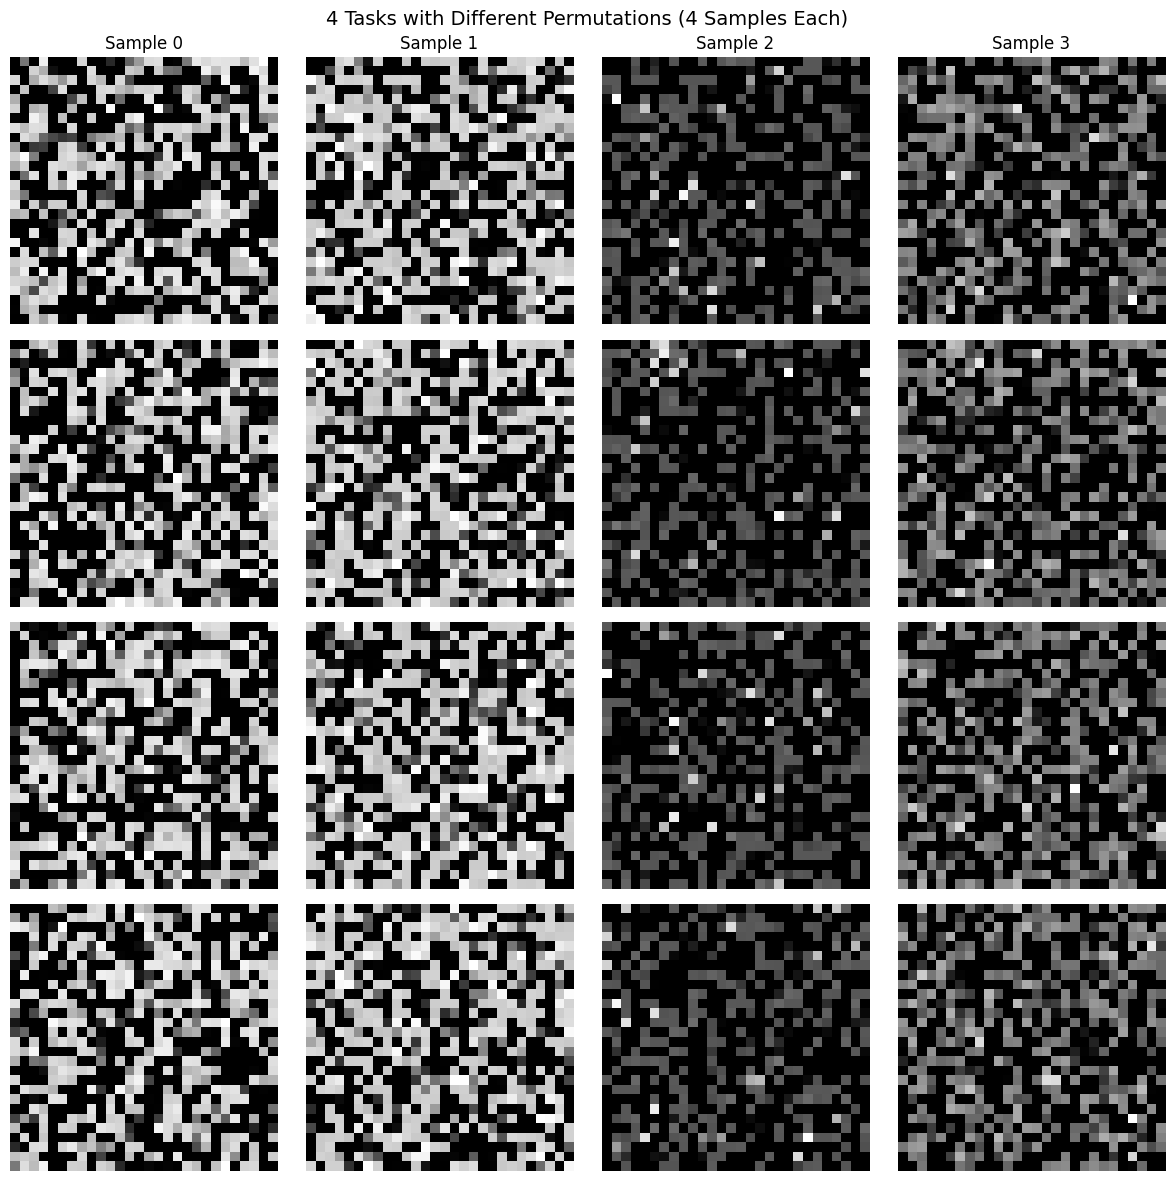

Created 4 permutation tasks


In [28]:
from hands_on_neuroai.data.datasets import build_task_datasets, PermutePixels, Rotate, DatasetConfig

# Config for MNIST
config = DatasetConfig(root="../data", download=False)

# Helper function to display images (handles both grayscale and color)
def imshow_img(ax, img_tensor):
    # Normalize to [0, 1] range for display
    img_min = img_tensor.min()
    img_max = img_tensor.max()
    if img_max > img_min:
        img_normalized = (img_tensor - img_min) / (img_max - img_min)
    else:
        img_normalized = img_tensor
    
    if img_normalized.shape[0] == 1:  # Grayscale
        ax.imshow(img_normalized.squeeze(), cmap='gray')
    elif img_normalized.shape[0] == 3:  # RGB
        ax.imshow(img_normalized.permute(1, 2, 0).numpy())
    else:
        ax.imshow(img_normalized.squeeze(), cmap='gray')

# Create 4 tasks with different permutations
task_transforms = [PermutePixels(seed=i) for i in range(num_tasks)]

# Build train/test datasets for all tasks
train_dsets, test_dsets = build_task_datasets(dataset, config, task_transforms)

# Visualize: 4 rows (tasks) x 4 columns (samples)
fig, axes = plt.subplots(num_tasks, 4, figsize=(12, 12))

for task_idx, task_ds in enumerate(train_dsets):
    for sample_idx in range(4):
        img, label = task_ds[sample_idx]
        ax = axes[task_idx, sample_idx]
        imshow_img(ax, img)
        if sample_idx == 0:
            ax.set_ylabel(f'Task {task_idx}', fontsize=12)
        if task_idx == 0:
            ax.set_title(f'Sample {sample_idx}', fontsize=12)
        ax.axis('off')

plt.suptitle('4 Tasks with Different Permutations (4 Samples Each)', fontsize=14)
plt.tight_layout()
plt.show()

print(f"Created {num_tasks} permutation tasks")

### Multi-Task: Rotations

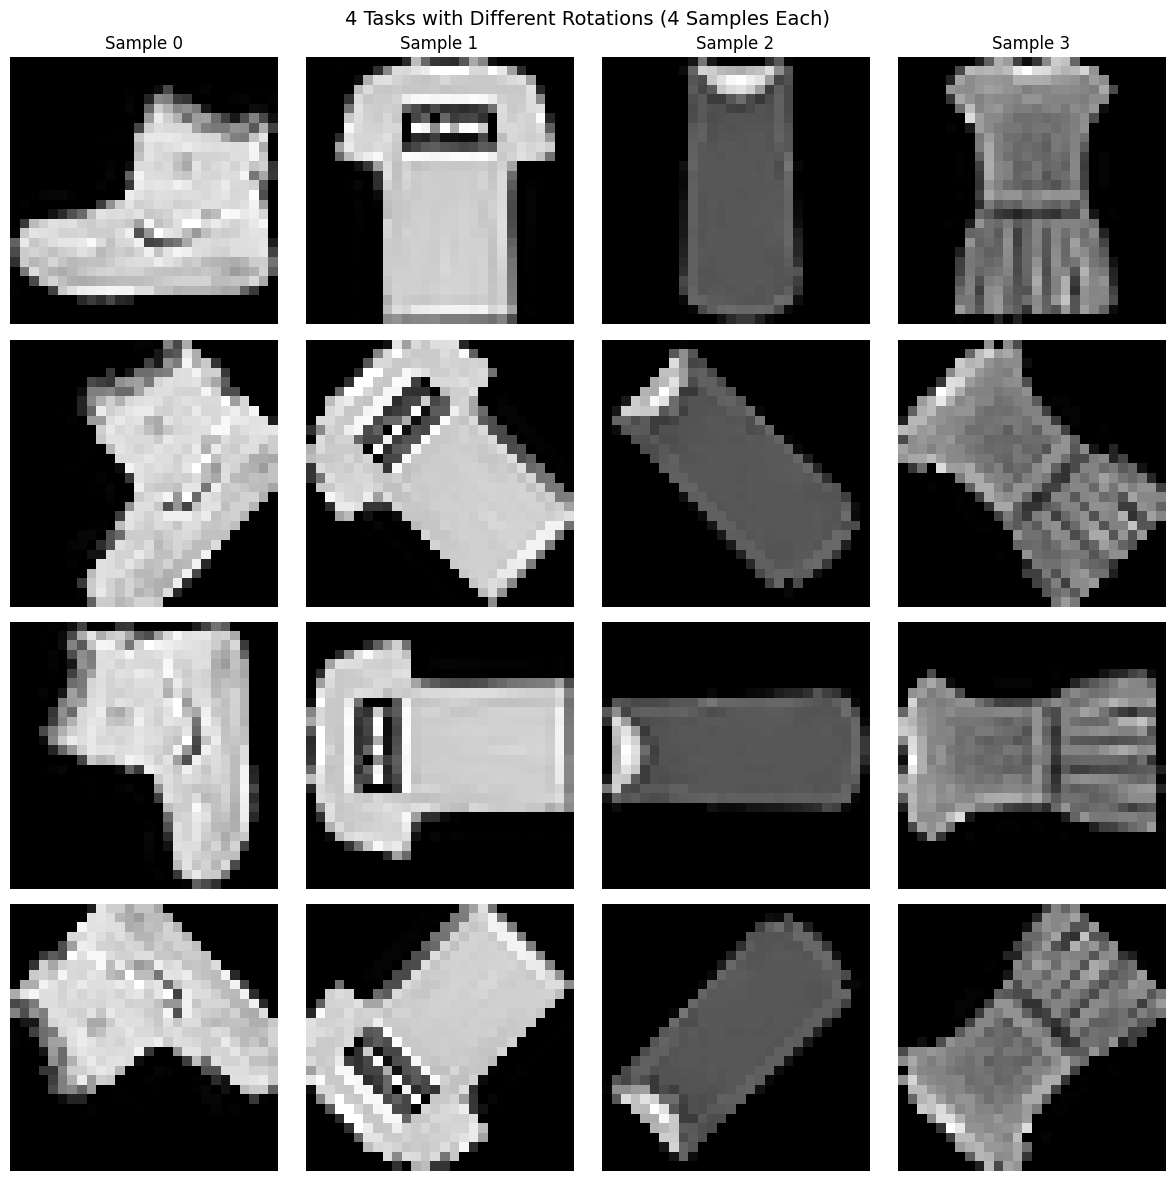

Created 4 rotation tasks with angles: [0, 45, 90, 135]


In [26]:
# Create 4 tasks with different rotations
num_tasks = 4
rotation_angles = [0, 45, 90, 135]
task_transforms = [Rotate(angle) for angle in rotation_angles]

# Build train/test datasets for all tasks
train_dsets, test_dsets = build_task_datasets(dataset, config, task_transforms)

# Visualize: 4 rows (tasks) x 4 columns (samples)
fig, axes = plt.subplots(num_tasks, 4, figsize=(12, 12))

for task_idx, task_ds in enumerate(train_dsets):
    for sample_idx in range(4):
        img, label = task_ds[sample_idx]
        ax = axes[task_idx, sample_idx]
        imshow_img(ax, img)
        if sample_idx == 0:
            ax.set_ylabel(f'Task {task_idx}\n({rotation_angles[task_idx]}°)', fontsize=12)
        if task_idx == 0:
            ax.set_title(f'Sample {sample_idx}', fontsize=12)
        ax.axis('off')

plt.suptitle(f'4 Tasks with Different Rotations (4 Samples Each)', fontsize=14)
plt.tight_layout()
plt.show()

print(f"Created {num_tasks} rotation tasks with angles: {rotation_angles}")

### Multi-Task: Class Splits

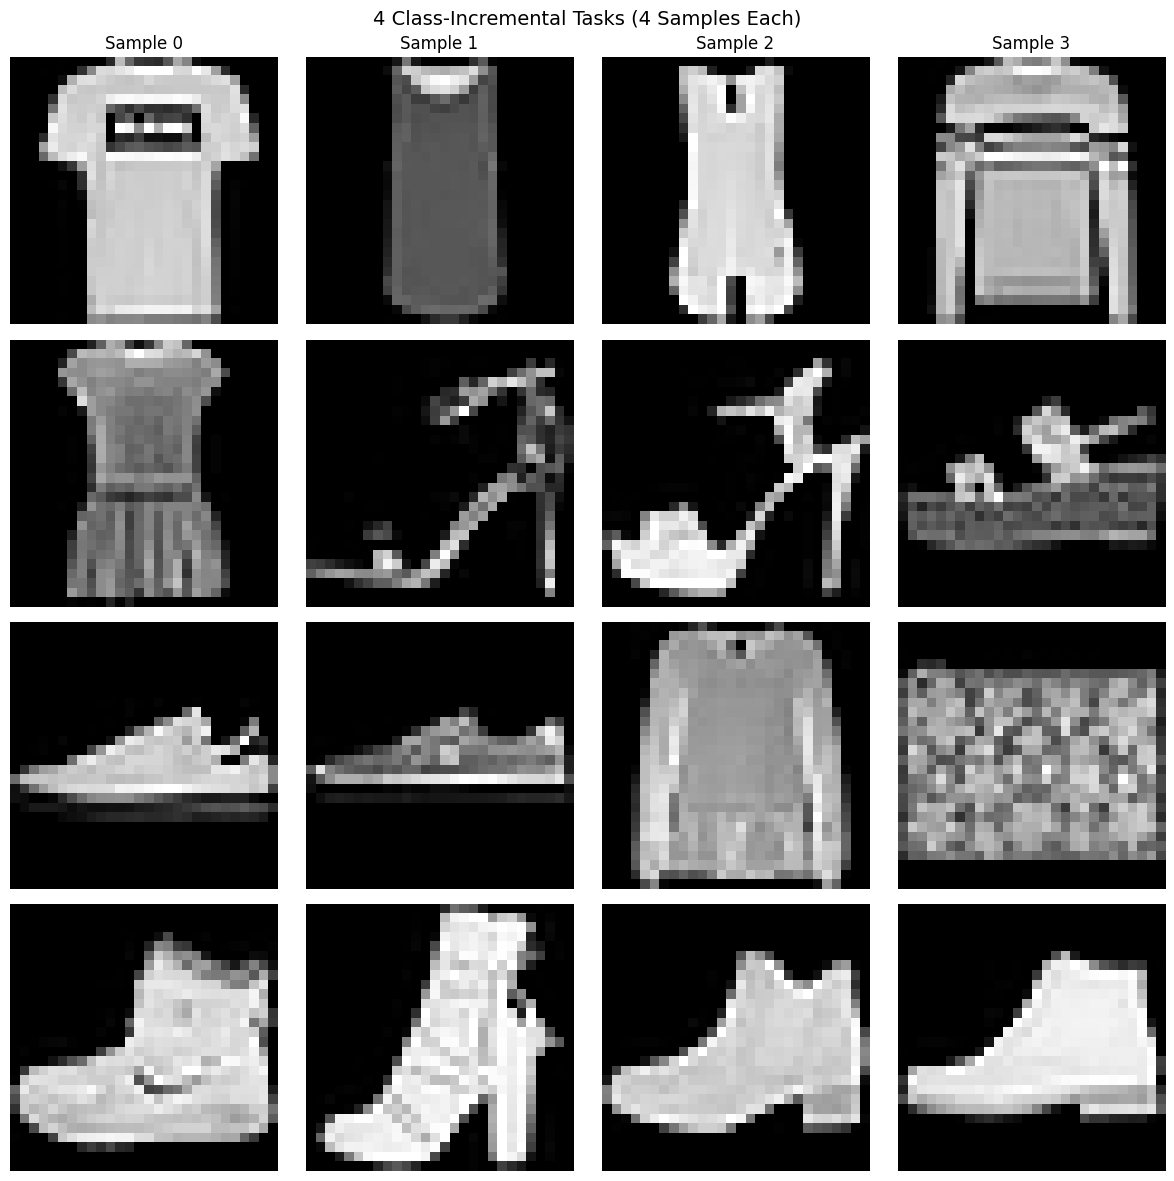

Created 4 class-split tasks


In [27]:
# Create 4 class-incremental tasks
from hands_on_neuroai.data.datasets import build_class_incremental_tasks

num_tasks = 4
class_splits = [[0, 1, 2], [3, 4, 5], [6, 7, 8], [9]]

# Build train/test datasets for all class-incremental tasks
train_dsets, test_dsets = build_class_incremental_tasks(dataset, config, class_splits)

# Visualize: 4 rows (tasks) x 4 columns (samples)
fig, axes = plt.subplots(num_tasks, 4, figsize=(12, 12))

for task_idx, task_ds in enumerate(train_dsets):
    for sample_idx in range(4):
        if sample_idx < len(task_ds):
            img, label = task_ds[sample_idx]
            ax = axes[task_idx, sample_idx]
            imshow_img(ax, img)
            if sample_idx == 0:
                ax.set_ylabel(f'Task {task_idx}\nClasses {class_splits[task_idx]}', fontsize=10)
            if task_idx == 0:
                ax.set_title(f'Sample {sample_idx}', fontsize=12)
            ax.axis('off')
        else:
            axes[task_idx, sample_idx].axis('off')

plt.suptitle('4 Class-Incremental Tasks (4 Samples Each)', fontsize=14)
plt.tight_layout()
plt.show()

print(f"Created {num_tasks} class-split tasks")